**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
pd.set_option("display.max.columns", None)

**Read data**

In [2]:
missing_values = [' ', ' -  '] # missing value pada dataset
nyc = pd.read_csv('nyc-rolling-sales.csv', na_values = missing_values)

In [3]:
nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,NaN,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,NaN,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,NaN,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,NaN,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,NaN,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


**Cek fitur dan jumlah baris**

In [4]:
nyc.shape

(84548, 22)

In [5]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

**Drop kolom Unnamed: 0 (tidak dibuthkan), EASE-MENT (tidak ada isinya), APARTMENT NUMBER (terlalu banyak missing values sehingga lebih baik kolomnya dihapus daripada barisnya)**

In [6]:
nyc['EASE-MENT'].value_counts()

Series([], Name: EASE-MENT, dtype: int64)

In [7]:
nyc['APARTMENT NUMBER'].value_counts()

4       298
3A      295
3B      275
2       275
2B      272
       ... 
ST50      1
ST54      1
SU13      1
SU21      1
363       1
Name: APARTMENT NUMBER, Length: 3988, dtype: int64

In [8]:
nyc.drop(columns=['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], inplace=True)

**Cek tipe data**

In [9]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  int64  
 1   NEIGHBORHOOD                    84548 non-null  object 
 2   BUILDING CLASS CATEGORY         84548 non-null  object 
 3   TAX CLASS AT PRESENT            83810 non-null  object 
 4   BLOCK                           84548 non-null  int64  
 5   LOT                             84548 non-null  int64  
 6   BUILDING CLASS AT PRESENT       83810 non-null  object 
 7   ADDRESS                         84548 non-null  object 
 8   ZIP CODE                        84548 non-null  int64  
 9   RESIDENTIAL UNITS               84548 non-null  int64  
 10  COMMERCIAL UNITS                84548 non-null  int64  
 11  TOTAL UNITS                     84548 non-null  int64  
 12  LAND SQUARE FEET                

Fitur BOROUGH merepesentasikan kode digit untuk wilayah tempat properti berada; dalam urutan ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5). Untuk itu kita dapat mengubah numerik menjadi object string. Kemudian terdapat dua fitur yang merepresentasikan TAX CLASS (PRESENT dan TIME OF SALE). Tetapi kedua fitur tersebut memiliki tipe data yang berbeda. Oleh karena itu kita perlu menyamakan tipe data kedua fitur tersebut. Selain itu juga TAX CLASS pada Glosarium terdiri dari 4 class yaitu class 1,2,3,4

In [10]:
def change_borough(borough):
    """
        Function for changing borough code into string of the borough
        
        parameter
        ---------
            borough : the borough code
            
        return
        ---------
            string of the borough or NaN
    """
    if borough == '1':
        return 'Manhattan'
    elif borough == '2':
        return 'Bronx'
    elif borough == '3':
        return 'Brooklyn'
    elif borough == '4':
        return 'Queens'
    elif borough == '5':
        return 'Staten Island'
    else:
        return np.nan

In [11]:
# Ubah tipe data nyc['BOROUGH'] dan nyc['TAX CLASS AT TIME OF SALE'] menjadi string 
nyc[['BOROUGH','TAX CLASS AT TIME OF SALE']] = nyc[['BOROUGH','TAX CLASS AT TIME OF SALE']].astype('str')

# Ubah borough code menjadi string nama boroughnya
nyc['BOROUGH'] =  nyc['BOROUGH'].apply(change_borough)

In [12]:
# Jumlah per unique value dari TAX CLASS AT PRESENT
nyc['TAX CLASS AT PRESENT'].value_counts()

1     38633
2     30919
4      6140
2A     2521
2C     1915
1A     1444
1B     1234
2B      814
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

In [13]:
# Jumlah per unique value dari TAX CLASS AT TIME OF SALE
nyc['TAX CLASS AT TIME OF SALE'].value_counts()

1    41533
2    36726
4     6285
3        4
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [14]:
# Mengelompokkan 1A, 1B, ... menjadi class 1; 2A, 2B, ... menjadi class 2, dst
for idx, value in nyc['TAX CLASS AT PRESENT'].items():
    if '1' in str(value):
        nyc.loc[idx, 'TAX CLASS AT PRESENT'] = '1'
    elif '2' in str(value):
        nyc.loc[idx, 'TAX CLASS AT PRESENT'] = '2'
    elif '3' in str(value):
        nyc.loc[idx, 'TAX CLASS AT PRESENT'] = '3'
    elif '4' in str(value):
        nyc.loc[idx, 'TAX CLASS AT PRESENT'] = '4'

In [15]:
# Jumlah per unique value dari TAX CLASS AT PRESENT setelah dikelompokkan
nyc['TAX CLASS AT PRESENT'].value_counts()

1    41497
2    36169
4     6140
3        4
Name: TAX CLASS AT PRESENT, dtype: int64

Fitur LAND SQUARE FEET, GROSS SQUARE FEET, dan SALE PRICE seharusnya bertipe data numerik sehingga perlu diubah menjadi numerik (jika ada baris yang tidak dapat diubah menjadi numerik maka akan menjadi nan)

In [16]:
to_numeric = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
for col in to_numeric:
    nyc[col] = pd.to_numeric(nyc[col], errors='coerce', downcast='signed')

Fitur SALE DATE seharusnya bertipe data datetime sehingga perlu diubah tipe datanya

In [17]:
nyc['SALE DATE'] = pd.to_datetime(nyc['SALE DATE'])

In [18]:
nyc['SALE YEAR'] = nyc['SALE DATE'].dt.year
nyc['SALE MONTH'] = nyc['SALE DATE'].dt.month

**Cek duplikat data**

In [19]:
nyc.duplicated().sum()

765

In [20]:
# drop duplikat data
nyc.drop_duplicates(inplace=True)

In [21]:
nyc.duplicated().sum()

0

In [22]:
nyc.shape

(83783, 21)

**Cek data yang tidak masuk akal**

Drop Zip code = 0 

In [23]:
nyc = nyc[nyc['ZIP CODE'] != 0]

In [24]:
nyc.shape

(82812, 21)

SALE PRICE = 0 (valid) karena banyak penjualan terjadi dengan jumlah dolar yang sangat kecil: $0 paling umum. Penjualan ini sebenarnya adalah transfer akta antar pihak: misalnya, orang tua mentransfer kepemilikan rumah mereka kepada seorang anak setelah pindah untuk pensiun. Tetapi price di bawah 10 usd terlihat tidak masuk akal maka akan di drop

In [25]:
nyc = nyc[(nyc['SALE PRICE'] == 0) | (nyc['SALE PRICE'] > 10)]

In [26]:
nyc.shape

(67962, 21)

**Cek Missing values**

In [27]:
nyc.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                293
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           293
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  20831
GROSS SQUARE FEET                 21181
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
SALE YEAR                             0
SALE MONTH                            0
dtype: int64

In [28]:
# isi missing value di TAX dan BUILDING CLASS PRESENT dengan TIME OF SALE 
# karena CLASS nya tidak akan jauh berbeda

nyc['TAX CLASS AT PRESENT'].fillna(nyc['TAX CLASS AT TIME OF SALE'], inplace=True)
nyc['BUILDING CLASS AT PRESENT'].fillna(nyc['BUILDING CLASS AT TIME OF SALE'], inplace=True)

In [29]:
nyc.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  20831
GROSS SQUARE FEET                 21181
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
SALE YEAR                             0
SALE MONTH                            0
dtype: int64

In [30]:
# isi missing value di Land Sq. Ft dengan Gross Sq. Ft jika Gross tidak null, dan sebaliknya

nyc['LAND SQUARE FEET'].fillna(nyc['GROSS SQUARE FEET'], inplace=True)
nyc['GROSS SQUARE FEET'].fillna(nyc['LAND SQUARE FEET'], inplace=True)

In [31]:
nyc.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  20827
GROSS SQUARE FEET                 20827
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
SALE YEAR                             0
SALE MONTH                            0
dtype: int64

In [32]:
# filter data dimana Land Sq. Ft. dan Gross Sq. Ft. tidak null

nyc_new = nyc[(nyc['LAND SQUARE FEET'].notnull()) & (nyc['GROSS SQUARE FEET'].notnull())]

In [33]:
nyc_new.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
SALE YEAR                         0
SALE MONTH                        0
dtype: int64

In [34]:
nyc_new.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,SALE MONTH
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,2017,7
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,2016,11
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,2016,11


### Berapa rata-rata value untuk setiap kolom numerik?

In [35]:
nyc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47135 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         47135 non-null  object        
 1   NEIGHBORHOOD                    47135 non-null  object        
 2   BUILDING CLASS CATEGORY         47135 non-null  object        
 3   TAX CLASS AT PRESENT            47135 non-null  object        
 4   BLOCK                           47135 non-null  int64         
 5   LOT                             47135 non-null  int64         
 6   BUILDING CLASS AT PRESENT       47135 non-null  object        
 7   ADDRESS                         47135 non-null  object        
 8   ZIP CODE                        47135 non-null  int64         
 9   RESIDENTIAL UNITS               47135 non-null  int64         
 10  COMMERCIAL UNITS                47135 non-null  int64         
 11  TO

BLOCK, LOT, ZIP CODE tidak termasuk kolom numerik karena:

BLOCK merupakan sub-divisi dari borough tempat properti sebenarnya berada (Label) <br>
LOT juga sama seperti BLOCK yang merupakan sub-divisi dari BLOCK yang merepresentasikan unique location <br>
ZIP CODE merupakan kode pos <br>
YEAR BUILT merupakan tahun

In [36]:
# rata2 fitur RESIDENTIAL UNITS
mean_res_units = nyc_new['RESIDENTIAL UNITS'].mean()
print('Mean of Residential Units:', round(mean_res_units,2))

# rata2 fitur COMMERCIAL UNITS
mean_com_units = nyc_new['COMMERCIAL UNITS'].mean()
print('Mean of Commercial Units:', round(mean_com_units,2))

# rata2 fitur TOTAL UNITS
mean_total_units = nyc_new['TOTAL UNITS'].mean()
print('Mean of Total Units:', round(mean_total_units,2))

# rata2 fitur LAND SQUARE FEET
mean_land = nyc_new['LAND SQUARE FEET'].mean()
print('Mean of Land Square Feet:', round(mean_land,2))

# rata2 fitur GROSS SQUARE FEET
mean_gross = nyc_new['GROSS SQUARE FEET'].mean()
print('Mean of Gross Square Feet:', round(mean_gross,2))

# rata2 fitur SALE PRICE
mean_price = nyc_new['SALE PRICE'].mean()
print('Mean of Sale Price:', round(mean_price,2))

Mean of Residential Units: 2.53
Mean of Commercial Units: 0.24
Mean of Total Units: 2.79
Mean of Land Square Feet: 3370.13
Mean of Gross Square Feet: 3674.68
Mean of Sale Price: 1201487.27


### Berapa rata-rata SALE PRICE di setiap BOROUGH?

In [37]:
# Mengelompokkan berdasarkan BOROUGHnya kemudian menghitung rata-rata SALE PRICEnya tiap BOROUGH

nyc_new.groupby(['BOROUGH'])['SALE PRICE'].mean()

BOROUGH
Bronx            6.068540e+05
Brooklyn         8.509849e+05
Manhattan        1.996032e+07
Queens           9.548699e+05
Staten Island    5.626357e+05
Name: SALE PRICE, dtype: float64

In [38]:
# Menghitung rata-rata SALE PRICE di tiap Borough tanpa groupby dan hasilnya sama

# Menghitung rata-rata SALE PRICE di Manhattan
mean_manhattan = nyc_new[nyc_new['BOROUGH'] == 'Manhattan']['SALE PRICE'].mean()
print('Manhattan:',round(mean_manhattan,2))

# Menghitung rata-rata SALE PRICE di Bronx
mean_bronx = nyc_new[nyc_new['BOROUGH'] == 'Bronx']['SALE PRICE'].mean()
print('Bronx:',round(mean_bronx,2))

# Menghitung rata-rata SALE PRICE di Brooklyn
mean_brooklyn = nyc_new[nyc_new['BOROUGH'] == 'Brooklyn']['SALE PRICE'].mean()
print('Brooklyn:',round(mean_brooklyn,2))

# Menghitung rata-rata SALE PRICE di Queens
mean_queens = nyc_new[nyc_new['BOROUGH'] == 'Queens']['SALE PRICE'].mean()
print('Queens:',round(mean_queens,2))

# Menghitung rata-rata SALE PRICE di Staten Island
mean_staten_island = nyc_new[nyc_new['BOROUGH'] == 'Staten Island']['SALE PRICE'].mean()
print('Staten Island:',round(mean_staten_island,2))

Manhattan: 19960319.41
Bronx: 606854.02
Brooklyn: 850984.9
Queens: 954869.93
Staten Island: 562635.68


### Berapa rata-rata SALE PRICE untuk setiap kategori TAX?

In [39]:
# Menghitung rata-rata SALE PRICE pada property dengan TAX CLASS = 1

mean_tax_1 = nyc_new[nyc_new['TAX CLASS AT PRESENT'] == '1']['SALE PRICE'].mean()
print(round(mean_tax_1,2))

mean_tax_sale_1 = nyc_new[nyc_new['TAX CLASS AT TIME OF SALE'] == '1']['SALE PRICE'].mean()
print(round(mean_tax_sale_1,2))

610021.02
609562.54


In [40]:
# Menghitung rata-rata SALE PRICE pada property dengan TAX CLASS = 2

mean_tax_2 = nyc_new[nyc_new['TAX CLASS AT PRESENT'] == '2']['SALE PRICE'].mean()
print(round(mean_tax_2,2))

mean_tax_sale_2 = nyc_new[nyc_new['TAX CLASS AT TIME OF SALE'] == '2']['SALE PRICE'].mean()
print(round(mean_tax_sale_2,2))

1486091.2
1481421.93


In [41]:
# Menghitung rata-rata SALE PRICE pada property dengan TAX CLASS = 4
# TAX CLASS = 3 tidak ada datanya sehingga tidak perlu dicari

mean_tax_4 = nyc_new[nyc_new['TAX CLASS AT PRESENT'] == '4']['SALE PRICE'].mean()
print(round(mean_tax_4,2))

mean_tax_sale_4 = nyc_new[nyc_new['TAX CLASS AT TIME OF SALE'] == '4']['SALE PRICE'].mean()
print(round(mean_tax_sale_4,2))

5737273.47
5748098.11


### Berapa rata-rata SALE PRICE untuk property yang bukan transfer deeds?

In [42]:
# Menghitung rata-rata SALE PRICE pada property dengan SALE PRICE bukan 0 (bukan warisan) 

non_trf = nyc_new[nyc_new['SALE PRICE'] != 0]
mean_non_trf = non_trf['SALE PRICE'].mean()
mean_non_trf

1520569.823515197

### Berapa rata-rata LAND SQUARE FEET pada daerah Bronx dan Brooklyn

In [43]:
# Menghitung rata-rata LAND SQUARE FEET (land area) Property di Bronx dan Brooklyn

land_bronx = nyc_new[nyc_new['BOROUGH'] == 'Bronx']['LAND SQUARE FEET'].mean()
print(land_bronx)

land_brooklyn = nyc_new[nyc_new['BOROUGH'] == 'Brooklyn']['LAND SQUARE FEET'].mean()
print(land_brooklyn)

3768.108341885354
2020.6039058803287


### Berapa median untuk setiap kolom numerik?

In [44]:
# median fitur RESIDENTIAL UNITS
median_res_units = nyc_new['RESIDENTIAL UNITS'].median()
print('Median of Residential Units:', median_res_units)

# median fitur COMMERCIAL UNITS
median_com_units = nyc_new['COMMERCIAL UNITS'].median()
print('Median of Commercial Units:', median_com_units)

# median fitur TOTAL UNITS
median_total_units = nyc_new['TOTAL UNITS'].median()
print('Median of Total Units:', median_total_units)

# median fitur LAND SQUARE FEET
median_land = nyc_new['LAND SQUARE FEET'].median()
print('Median of Land Square Feet:', median_land)

# median fitur GROSS SQUARE FEET
median_gross = nyc_new['GROSS SQUARE FEET'].median()
print('Median of Gross Square Feet:', median_gross)

# median fitur SALE PRICE
median_price = nyc_new['SALE PRICE'].median()
print('Median of Sale Price:', median_price)

Median of Residential Units: 1.0
Median of Commercial Units: 0.0
Median of Total Units: 1.0
Median of Land Square Feet: 2143.0
Median of Gross Square Feet: 1632.0
Median of Sale Price: 495000.0


### Berapa median SALE PRICE di setiap BOROUGH?

In [45]:
# Menghitung median SALE PRICE di daerah Manhattan
median_manhattan = nyc_new[nyc_new['BOROUGH'] == 'Manhattan']['SALE PRICE'].median()
print('Manhattan:',round(median_manhattan,2))

# Menghitung median SALE PRICE di daerah Bronx
median_bronx = nyc_new[nyc_new['BOROUGH'] == 'Bronx']['SALE PRICE'].median()
print('Bronx:',round(median_bronx,2))

# Menghitung median SALE PRICE di daerah Brooklyn
median_brooklyn = nyc_new[nyc_new['BOROUGH'] == 'Brooklyn']['SALE PRICE'].median()
print('Brooklyn:',round(median_brooklyn,2))

# Menghitung median SALE PRICE di daerah Queens
median_queens = nyc_new[nyc_new['BOROUGH'] == 'Queens']['SALE PRICE'].median()
print('Queens:',round(median_queens,2))

# Menghitung median SALE PRICE di daerah Staten Island
median_staten_island = nyc_new[nyc_new['BOROUGH'] == 'Staten Island']['SALE PRICE'].median()
print('Staten Island:',round(median_staten_island,2))

Manhattan: 6800000.0
Bronx: 285000.0
Brooklyn: 440000.0
Queens: 641000.0
Staten Island: 490000.0


### Berapa median SALE PRICE untuk setiap kategori Tax?

In [46]:
# Menghitung median SALE PRICE pada tax class 1
median_tax_1 = nyc_new[nyc_new['TAX CLASS AT PRESENT'] == '1']['SALE PRICE'].median()
print(round(median_tax_1,2))

median_tax_sale_1 = nyc_new[nyc_new['TAX CLASS AT TIME OF SALE'] == '1']['SALE PRICE'].median()
print(round(median_tax_sale_1,2))

500000.0
500000.0


In [47]:
# Menghitung median SALE PRICE pada tax class 2
median_tax_2 = nyc_new[nyc_new['TAX CLASS AT PRESENT'] == '2']['SALE PRICE'].median()
print(round(median_tax_2,2))

median_tax_sale_2 = nyc_new[nyc_new['TAX CLASS AT TIME OF SALE'] == '2']['SALE PRICE'].median()
print(round(median_tax_sale_2,2))

492790.0
495000.0


In [48]:
# Menghitung median SALE PRICE pada tax class 4
median_tax_4 = nyc_new[nyc_new['TAX CLASS AT PRESENT'] == '4']['SALE PRICE'].median()
print(round(median_tax_4,2))

median_tax_sale_4 = nyc_new[nyc_new['TAX CLASS AT TIME OF SALE'] == '4']['SALE PRICE'].median()
print(round(median_tax_sale_4,2))

99000.0
96330.0


### Modus pada setiap kategorikal data?

In [49]:
# modus fitur BOROUGH 
mode_borough = nyc_new['BOROUGH'].mode()
print('Mode of Borough:', mode_borough.values)

# modus fitur BOROUGH yang tidak termasuk transfer deeds
borough_wo_trf = nyc_new[nyc_new['SALE PRICE'] != 0]['BOROUGH'].mode()
print('Mode of Borough:', borough_wo_trf.values)

# modus fitur NEIGHBORHOOD 
mode_neighborhood = nyc_new['NEIGHBORHOOD'].mode()
print('Mode of Neighborhood:', mode_neighborhood.values)

# modus fitur BUILDING CLASS CATEGORY 
mode_bcc = nyc_new['BUILDING CLASS CATEGORY'].mode()
print('Mode of Building Class Category:', mode_bcc.values)

# modus fitur TAX CLASS PRESENT 
mode_tax_present = nyc_new['TAX CLASS AT PRESENT'].mode()
print('Mode of Tax Class Present:', mode_tax_present.values)

# modus fitur TAX CLASS TIME OF SALE 
mode_tax_sale = nyc_new['TAX CLASS AT TIME OF SALE'].mode()
print('Mode of Tax Class Time of Sale:', mode_tax_sale.values)

# modus fitur TAX CLASS TIME OF SALE 
mode_tax_sale = nyc_new['TAX CLASS AT TIME OF SALE'].mode()
print('Mode of Tax Class Time of Sale:', mode_tax_sale.values)

Mode of Borough: ['Brooklyn']
Mode of Borough: ['Brooklyn']
Mode of Neighborhood: ['BEDFORD STUYVESANT']
Mode of Building Class Category: ['01 ONE FAMILY DWELLINGS                    ']
Mode of Tax Class Present: ['1']
Mode of Tax Class Time of Sale: ['1']
Mode of Tax Class Time of Sale: ['1']


### Berapa range/jangkauan dari SALE PRICE, LAND sq. ft. ,GROSS sq. ft.

In [50]:
# Menghitung jangkauan (nilai tertinggi - nilai terendah) SALE PRICE
range_sale_price = np.ptp(nyc_new['SALE PRICE'])
print(min(nyc_new['SALE PRICE']),max(nyc_new['SALE PRICE']),range_sale_price)

0.0 2210000000.0 2210000000.0


In [51]:
# Menghitung jangkauan (nilai tertinggi - nilai terendah) LAND SQUARE FEET (Land Area)
range_land = np.ptp(nyc_new['LAND SQUARE FEET'])
print(min(nyc_new['LAND SQUARE FEET']),max(nyc_new['LAND SQUARE FEET']),range_land)

0.0 4228300.0 4228300.0


In [52]:
# Menghitung jangkauan (nilai tertinggi - nilai terendah) GROSS SQUARE FEET (Gross Area)
range_gross = np.ptp(nyc_new['GROSS SQUARE FEET'])
print(min(nyc_new['GROSS SQUARE FEET']),max(nyc_new['GROSS SQUARE FEET']),range_gross)

0.0 3750565.0 3750565.0


### Berapa Variance dan Standar Deviasi untuk setiap kolom numerik?

In [53]:
# Menghitung variasi nilai RESIDENTIAL UNIT
var_res_units = np.var(nyc_new['RESIDENTIAL UNITS'], ddof=1)
print('Residential Units Variance:', round(var_res_units,2))

# Menghitung variasi nilai COMMERCIAL UNIT
var_com_units = np.var(nyc_new['COMMERCIAL UNITS'], ddof=1)
print('Commercial Units Variance:', round(var_com_units,2))

# Menghitung variasi nilai TOTAL UNIT
var_total_units = np.var(nyc_new['TOTAL UNITS'], ddof=1)
print('Total Units Variance:', round(var_total_units,2))

# Menghitung variasi nilai LAND SQUARE FEET
var_land = np.var(nyc_new['LAND SQUARE FEET'], ddof=1)
print('Land Sq. Ft. Variance:', round(var_land,2))

# Menghitung variasi nilai GROSS SQUARE FEET
var_gross = np.var(nyc_new['GROSS SQUARE FEET'], ddof=1)
print('Gross Sq. Ft. Variance:', round(var_gross,2))

# Menghitung variasi nilai SALE PRICE
var_sale_price = np.var(nyc_new['SALE PRICE'], ddof=1)
print('Sale Price Variance:', round(var_sale_price,2))

Residential Units Variance: 296.32
Commercial Units Variance: 119.52
Total Units Variance: 420.74
Land Sq. Ft. Variance: 1128266993.09
Gross Sq. Ft. Variance: 1122910128.36
Sale Price Variance: 185277302488793.12


In [54]:
# Menghitung standar deviasi dari RESIDENTIAL UNIT
std_res_units = var_res_units**0.5
print('Residential Units Std:', round(std_res_units,2))

# Menghitung standar deviasi dari COMMERCIAL UNIT
std_com_units =  var_com_units**0.5
print('Commercial Units Std:', round(std_com_units,2))

# Menghitung standar deviasi dari TOTAL UNIT
std_total_units =  var_total_units**0.5
print('Total Units Std:', round(std_total_units,2))

# Menghitung standar deviasi dari LAND SQUARE FEET
std_land =  var_land**0.5
print('Land Sq. Ft. Std:', round(std_land,2))

# Menghitung standar deviasi dari GROSS SQUARE FEET
std_gross =  var_gross**0.5
print('Gross Sq. Ft. Std:', round(std_gross,2))

# Menghitung standar deviasi dari SALE PRICE
std_sale_price =  var_sale_price**0.5
print('Sale Price Std:', round(std_sale_price,2))

Residential Units Std: 17.21
Commercial Units Std: 10.93
Total Units Std: 20.51
Land Sq. Ft. Std: 33589.69
Gross Sq. Ft. Std: 33509.85
Sale Price Std: 13611660.53


### Bagaimana Distribusi dari SALE PRICE di setiap Borough?

C:\Users\USER\anaconda3\envs\H8_001\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


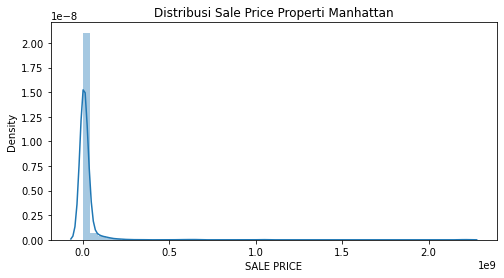

In [55]:
# lihat distribusi sale price dengan boroughnya adalah Manhattan
plt.figure(figsize=(8,4))
sns.distplot(nyc_new[nyc_new['BOROUGH'] == 'Manhattan']['SALE PRICE'])
plt.title('Distribusi Sale Price Properti Manhattan')
plt.show()

C:\Users\USER\anaconda3\envs\H8_001\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


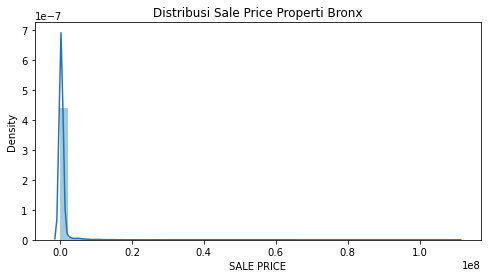

In [56]:
# lihat distribusi sale price dengan boroughnya adalah Bronx
plt.figure(figsize=(8,4))
sns.distplot(nyc_new[nyc_new['BOROUGH'] == 'Bronx']['SALE PRICE'])
plt.title('Distribusi Sale Price Properti Bronx')
plt.show()

C:\Users\USER\anaconda3\envs\H8_001\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


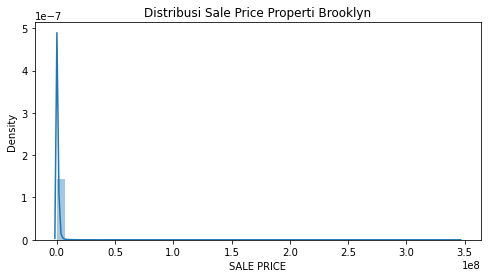

In [57]:
# lihat distribusi sale price dengan boroughnya adalah Brooklyn
plt.figure(figsize=(8,4))
sns.distplot(nyc_new[nyc_new['BOROUGH'] == 'Brooklyn']['SALE PRICE'])
plt.title('Distribusi Sale Price Properti Brooklyn')
plt.show()

C:\Users\USER\anaconda3\envs\H8_001\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


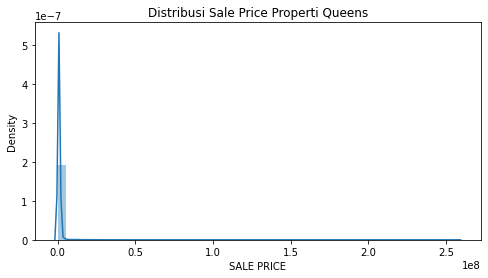

In [58]:
# lihat distribusi sale price dengan boroughnya adalah Queens
plt.figure(figsize=(8,4))
sns.distplot(nyc_new[nyc_new['BOROUGH'] == 'Queens']['SALE PRICE'])
plt.title('Distribusi Sale Price Properti Queens')
plt.show()

C:\Users\USER\anaconda3\envs\H8_001\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


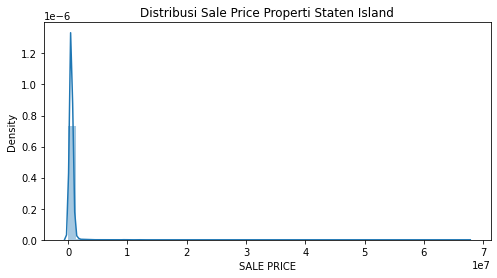

In [59]:
# lihat distribusi sale price dengan boroughnya adalah Staten Island
plt.figure(figsize=(8,4))
sns.distplot(nyc_new[nyc_new['BOROUGH'] == 'Staten Island']['SALE PRICE'])
plt.title('Distribusi Sale Price Properti Staten Island')
plt.show()

Dari grafik di atas dapat dilihat bahwa distribusi penjualan/sale price secara keseluruhan di tiap borough tidak lah normal (Right-Skew/Positif Skew). Jika dilihat dari grafiknya kemungkinan data sale price ini berdistribusi exponential atau gamma. Dimana nilai sale price yang lebih kecil paling banyak muncul kemudian menurun frekuensinya seiring bertambahnya harga penjualan

### Berapa rata-rata SALE PRICE populasi property MANHATTAN yang bukan transfer deeds dengan CI 95%?

In [60]:
# data yang bukan trf deed dengan boroughnya adalah Manhattan
non_trf_manhattan = non_trf[non_trf['BOROUGH'] == 'Manhattan']

C:\Users\USER\anaconda3\envs\H8_001\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


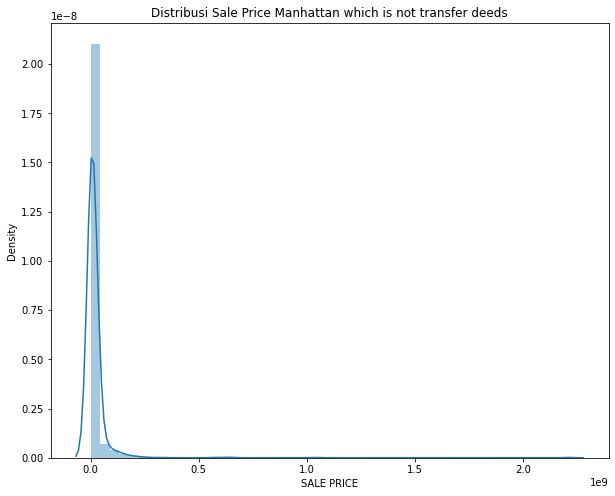

In [61]:
# lihat distribusi sale price dari data yang bukan trf deed dengan boroughnya adalah Manhattan
plt.figure(figsize=(10,8))
sns.distplot(non_trf_manhattan['SALE PRICE'])
plt.title('Distribusi Sale Price Manhattan which is not transfer deeds')
plt.show()

Karena distribusinya tidak normal maka kita perlu mengimplementasikan Central limit theorem. 

In [62]:
# Cek apakah property di Manhattan ada yang di wariskan
nyc_new[(nyc_new['BOROUGH'] == 'Manhattan') & (nyc_new['SALE PRICE'] == 0)]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,SALE MONTH


Karena pada data manhattan tidak ada sale price = 0 yang berarti tidak ada transfer deeds maka meannya sama dengan mean_manhattan pada question nomor 2

In [63]:
mean_manhattan

19960319.4127967

In [64]:
# Menghitung standar deviasi dari sale pricenya
std_nontrf_manhattan = non_trf_manhattan['SALE PRICE'].std()
std_nontrf_manhattan

89559248.02099727

Kita akan mengambil 300 sampel masing-masing dari 3000 nilai acak. Untuk setiap sampel, kita akan menghitung rata-rata sampel. Kemudian menyimpan semua sample means tersebut dalam list sample_means.

In [93]:
sample_means = []
n = 3000
for sample in range(0, 300):
    sample_values = np.random.choice(a=non_trf_manhattan['SALE PRICE'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

C:\Users\USER\anaconda3\envs\H8_001\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

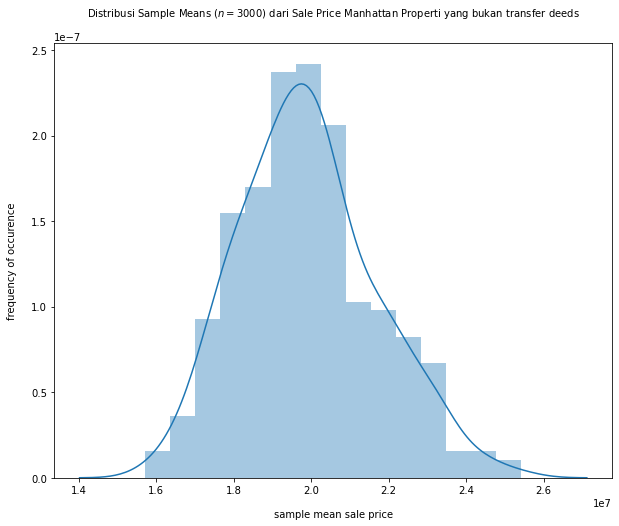

In [94]:
# lihat distribusi sample means sale price dari data yang bukan trf deed dengan boroughnya adalah Manhattan
plt.figure(figsize=(10,8))
sns.distplot(sample_means)
plt.title("Distribusi Sample Means ($n=3000$) dari Sale Price Manhattan Properti yang bukan transfer deeds", y=1.015, fontsize=10, pad=20)
plt.xlabel("sample mean sale price", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.show

In [95]:
scipy.stats.skew(sample_means, bias=False)

0.37308290493338064

Berdasarkan central limit theorem, pengambilan sampel dengan n = 3000 akan menghasilkan distribusi sample means yang mendekati normal (skewnessnya mendekati 0 yang berarti hampir simetris)

In [96]:
# Menghitung Median dari Sample Means
median_of_sample_means = np.median(sample_means)
median_of_sample_means

19803739.321333334

In [97]:
# Menghitung Mean dari Sample Means
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

19905196.85305111

In [98]:
# Mean populasi, Mean Sample
mean_manhattan, mean_of_sample_means

(19960319.4127967, 19905196.85305111)

Nilai mean_of_sample_means ini kira-kira sama dengan nilai population mean yang kita tetapkan ke variabel mean_manhattan. Berdasarkan central limit theorem, hal ini akan selalu terjadi.

In [99]:
# Menghitung Standar Deviasi dari Sample Means
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

1761838.2017687296

Standard deviation dari sample means lebih sering disebut standard error (SE). Persamaan untuk standard error adalah:

SE=σ/√n

σ is population standard deviation <br>
n is sample size

In [100]:
# Menghitung Standar error dengan rumus di atas
standard_error = std_nontrf_manhattan/np.sqrt(n)
standard_error

1635120.679143337

Nilai standard error (1,6 jt) ini hampir sama dengan nilai yang dihitung di atas untuk std_dev_of_sample_means (1,7 jt).

In [101]:
# z-score untuk 95%
z_score = 1.96

# batas bawah confidence interval
lower_95_perc_bound = mean_of_sample_means - (z_score*standard_error)

# batas atas confidence interval
upper_95_perc_bound = mean_of_sample_means + (z_score*standard_error)

lower_95_perc_bound, upper_95_perc_bound

(16700360.32193017, 23110033.384172052)

CI 95% menyatakan bahwa rata-rata SALE PRICE dari populasi MANHATTAN yang bukan transfer deeds berkisar antara 16 juta (16,700,360.32193017) hingga 23 juta (23,110,033.384172052) USD

### Apakah penjualan property di Bronx lebih tinggi secara signifikan daripada di Brooklyn pada tahun 2016-2017?

**Null dan Alternatif Hipotesis**

ho => penjualan property Bronx >= penjualan property Brooklyn (null hypothesis) <br> 
ha => penjualan property Bronx < penjualan property Brooklyn

**Calculate rata-rata penjualan property Bronx, rata-rata penjualan property Brooklyn**

In [102]:
# rata-rata penjualan property di Bronx
mean_bronx

606854.0187655769

In [103]:
# rata-rata penjualan property di Brooklyn
mean_brooklyn

850984.8985245408

Hasil kalkulasi rata-rata penjualan property di Bronx lebih kecil dari Manhattan dengan rata-rata Bronx 606854.0187655769 dan Brooklyn 850984.8985245408. tetapi apakah nilainya berbeda secara signifikan?

In [104]:
# data dengan borough Bronx dan data dengan borough Brooklyn
bronx = nyc_new[nyc_new['BOROUGH'] == 'Bronx']
brooklyn = nyc_new[nyc_new['BOROUGH'] == 'Brooklyn']

In [105]:
# menghitung ztest dan mendapatkan nilai p value
sm.stats.ztest(bronx["SALE PRICE"], brooklyn["SALE PRICE"],alternative='two-sided')

(-4.715016731831338, 2.416908875624625e-06)

Karena p-value (2.4169e-06) kecil dari  alpha (0.05), kita dapat reject null hypothesis bahwa rata-rata penjualan properti di Bronx lebih besar dan sama dengan rata-rata penjualan properti di Brooklyn. Sehingga rata-rata Bronx 606854.0187655769 kurang dari rata-rata Brooklyn yaitu 850984.8985245408 

### Kesimpulan

Berdasarkan data yang telah diobservasi didapatkan informasi sebagai berikut:

- Rata-rata Penjualan (SALE PRICE) tertinggi ada di penjualan properti di Manhattan dan terendah di Staten Island
- Penjualan properti dengan TAX CLASS 4 memiliki rata-rata penjualan yang lebih tinggi daripada kelas yang lainnya (Kelas 4 : Termasuk semua properti lain yang tidak termasuk dalam kelas 1,2, dan 3, seperti kantor, pabrik, gudang, gedung garasi, dll.)
- Rata-rata penjualan untuk data yang bukan transfer deeds atau bukan warisan/turun-temurun adalah 1,520,569.823515197 (1,5jt)
- Rata-rata luas area land properti untuk daerah Bronx lebih besar daripada Brooklyn
- Data dengan borough Brooklyn dan building class 'BEDFORD STUYVESANT'  muncul paling banyak di dataset ini.
- Data penjualan di setiap borough memiliki distribusi yang tidak normal (jika dilihat dari gambar kemungkinannya adalah distribusi eksponential atau gamma). Sehingga central tendencynya direpresentasikan oleh mediannya
- Jarak antar data point SALE PRICE sangat besar yaitu 13,611,660.53
- Berdasarkan CI 95% rata-rata SALE PRICE property di Manhattan yang bukan trf deeds berkisar antara 16 hingga 23 juta
- penjualan property di Bronx lebih rendah secara signifikan daripada di Brooklyn

Berdasarkan wikipedia borough yang memiliki daerah terluas adalah Queens


![borough](img\borough1.png)
Lima Borough New York City: 1: Manhattan 2: Brooklyn 3: Queens 4: The Bronx 5: Staten Island <br>
sumber:https://id.wikipedia.org/wiki/Borough_(Kota_New_York)


Tetapi penjualan tertinggi berasal dari Manhattan dan yang paling laku berasal dari Brooklyn. Sehingga perusahaan property dapat memanfaatkan hal ini yaitu dengan menjual property di Brooklyn dan Manhattan lebih banyak daripada di borough lainnya. 